# Importing Libraries

In [106]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [107]:
#Read CSV file
df = pd.read_csv("./Netflix Dataset.csv")

In [110]:
#Show first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [111]:
df.shape

(8807, 12)

# Dataset Information
- show_id : Unique id for each row
- type : Type of content. Movie/TV Show
- title : Name of movie or TV Show
- director : Director of movie or TV Show
- cast : Cast of the film or TV Show
- country : Country from where content was originated
- date_added : Date when the content was added to netflix
- release_year : Release year of content
- rating : content rating classification. TV-MA/PG-13 etc.,.
- duration	: Duration of movie or TV show. Min/Seasons
- listed_in : Content category. Documentaries/International TV Shows, TV Dramas, TV Mysteries etc.,
- description : Description of content

### **Numerical Variables:**
- release_year

### **Categorical Variables:**
- show_id
- type
- title
- director
- cast
- country
- date_added (e.g., 2012-12-06 and Jan 02, 2021)
- rating (e.g., TV-MA, PG-13)
- duration (e.g., 90 min, 2 Seasons)
- listed_in (e.g., TV Dramas, TV Mysteries)
- description

## Perform data checks

In [112]:
#Check null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration        3263
listed_in          0
description        0
dtype: int64

In [113]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [114]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      5544 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [115]:
#Check the number of unique values of each column
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            14
duration         208
listed_in        514
description     8775
dtype: int64

In [116]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.08%
duration null rate: 37.05%


# Data cleaning

### So our aim is to :
- Fill missing values
- Convert some inccorect dates. For example; August, 15 2021 to 2021-08-15 and convert type to datetime

In [117]:
#Fill missing values for director, cast, country
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

In [118]:
# #Fill empty date with mode
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [119]:
#Fill empty rating with mode
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [120]:
#Fill empty duration with zeros
df['duration'].fillna(0,inplace=True)

### Data conversion

In [121]:
#convert all dates to Y-M-D
def convert_date(date):
    return pd.to_datetime(date).strftime("%Y-%m-%d")
df['date_added'] = df['date_added'].apply(convert_date)
# Convert date from strings to date format
df['date_added'] = pd.to_datetime(df['date_added'])

# Data Pre-Processing

### To train our model let us do some feature engneering on some of the columns
- Extract year and month for our analysis and prediction
- Remove strings in duration column and make two separate columns for duration and no of seasons in integer.
- Encode type, rating and listed_in columns.

### Feature engineering

In [122]:
#Extract year and month from date added
df['month_added']=df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
#df.loc[df['show_id']=='s8756']

In [123]:
#Create separate columns for movies and TV shows 
# Convert 'duration' to string to avoid type errors
df['duration'] = df['duration'].astype(str)

# Extract duration in minutes, set to 0 if 'min' is not in the string
df['duration_in_minutes'] = df['duration'].apply(
    lambda x: int(x.split()[0]) 
    if 'min' in x 
    else 0
)
# Extract number of seasons
df['no_of_seasons'] = df['duration'].apply(
    lambda x:int(x.split()[0]) 
    if 'Season' in x or 'Seasons' in x 
    else 0
)

In [124]:
#Labels encoding
df['type_encoded']= df['type'].astype('category').cat.codes
df['rating_encoded'] = df['rating'].astype('category').cat.codes
df['listed_in_encoded'] = df['listed_in'].astype('category').cat.codes

In [125]:
df2 = df.drop(columns=['type', 'rating', 'listed_in', 'duration'])
df2.head()

,show_id,title,director,cast,country,date_added,release_year,description,month_added,year_added,duration_in_minutes,no_of_seasons,type_encoded,rating_encoded,listed_in_encoded
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,"As her father nears the end of his life, filmm...",9,2021,90,0,0,4,274
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,"After crossing paths at a party, a Cape Town t...",9,2021,0,2,1,8,414
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,To protect his family from a powerful drug lor...,9,2021,0,1,1,8,242
3,s4,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,"Feuds, flirtations and toilet talk go down amo...",9,2021,0,1,1,8,297
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,In a city of coaching centers known to train I...,9,2021,0,2,1,8,393


In [126]:
### Printing categories 
print("Categories in 'type' variable :",end=" ")
print(df['type'].unique())

print("Categories in 'rating' variable :",end=" ")
print(df['rating'].unique())

print("Categories in in 'month_added' variable :",end=" ")
print(df['month_added'].unique())

print("Categories in 'year_added' variable :",end=" ")
print(df['year_added'].unique())

print("Categories in 'no_of_seasons' variable : ", end =" ")
print(df['no_of_seasons'].unique())


Categories in 'type' variable : ['Movie' 'TV Show']
Categories in 'rating' variable : ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']
Categories in in 'month_added' variable : [ 9  8  7  6  5  4  3  2  1 12 11 10]
Categories in 'year_added' variable : [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]
Categories in 'no_of_seasons' variable :  [ 0  2  1  9  4  5  3  6  7 10  8 17 13 15 12]


In [127]:
#df.to_csv('Netflix_cleaned.csv',index=False, encoding='utf-8')

In [128]:
#df=df.drop(columns=['type','rating','duration','listed_in'])

In [129]:
#df
#df.loc[df['show_id']=='s4210']

# Basic Statistics

In [130]:
df.describe()

,date_added,release_year,month_added,year_added,duration_in_minutes,no_of_seasons,type_encoded,rating_encoded,listed_in_encoded
count,8807,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000
mean,2019-05-17 12:13:09.735437824,2014.180198,6.648575,2018.873169,40.600318,0.401499,0.303849,7.018622,272.640059
min,2008-01-01 00:00:00,1925.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-06 00:00:00,2013.000000,4.000000,2018.000000,0.000000,0.000000,0.000000,6.000000,199.000000
50%,2019-07-04 00:00:00,2017.000000,7.000000,2019.000000,0.000000,0.000000,0.000000,8.000000,289.000000
75%,2020-08-18 00:00:00,2019.000000,10.000000,2020.000000,94.000000,0.000000,1.000000,8.000000,367.500000
max,2021-09-25 00:00:00,2021.000000,12.000000,2021.000000,312.000000,17.000000,1.000000,13.000000,513.000000
std,NaN,8.819312,3.439879,1.573808,52.813051,1.053762,0.459944,1.950528,131.475068


### Insights
- The earliest entry is in 2008-01-01 and recent was 2021-09-25 according to our dataset
- Most of the movies were added in between 2019 - 2020.
- Movies added were released from 1925 to 2021 latest.
- Movie with highest of duration 312 minutes and seasons with 17.

In [131]:
df.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,duration_in_minutes,no_of_seasons,type_encoded,rating_encoded,listed_in_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,90,0,0,4,274
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,0,2,1,8,414
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,0,1,1,8,242
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,0,1,1,8,297
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,0,2,1,8,393
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,2021,0,1,1,8,499
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,2021,91,0,0,3,121


# Exploring Data (Visualisations)

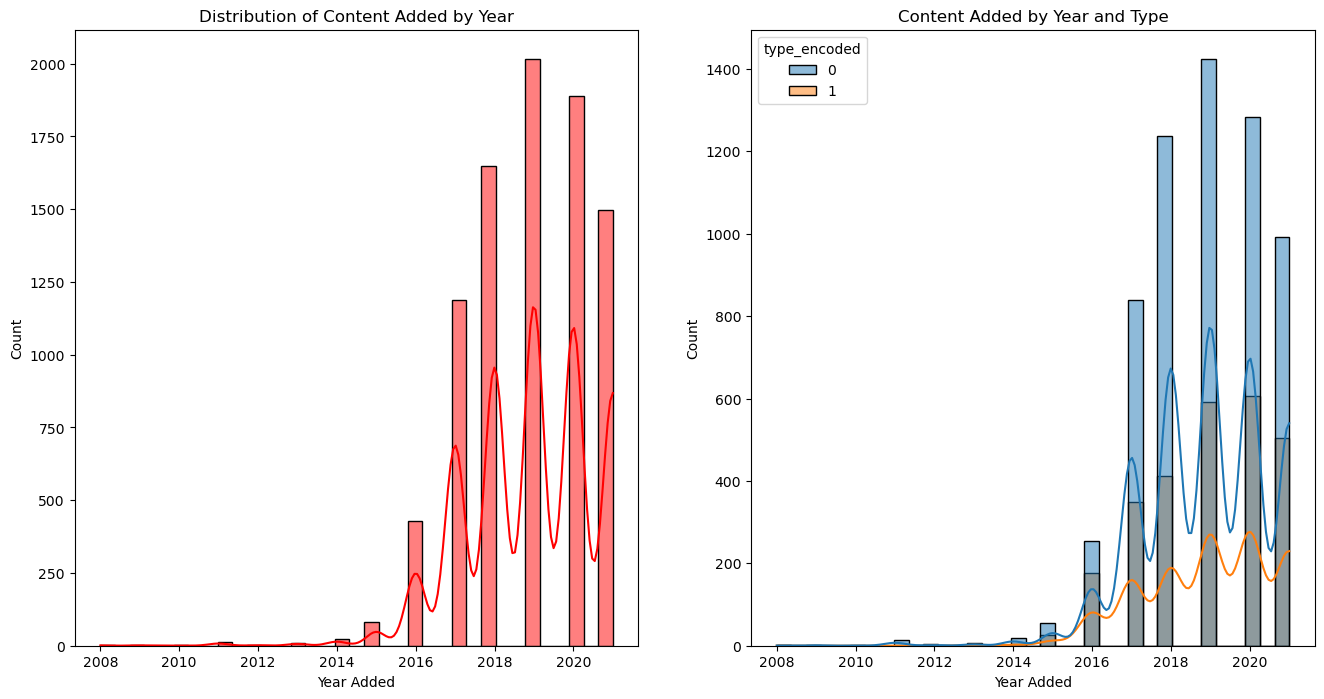

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Histogram of 'year_added' with KDE and custom bins
sns.histplot(data=df, x='year_added', bins=35, kde=True, color='red', ax=axs[0])
axs[0].set(title='Distribution of Content Added by Year',xlabel='Year Added',ylabel='Count')

# Plot 2: Histogram of 'year_added' with KDE, hue based on 'type_encoded'
sns.histplot(data=df, x='year_added', bins=35, kde=True, hue='type_encoded', ax=axs[1])
axs[1].set(title='Content Added by Year and Type',xlabel='Year Added',ylabel='Count')
plt.show()

### Insights 
- We can see a slow start for Netflix over several years. Things begin to pick up in 2015 and then there is a rapid increase from 2016.It looks like content additions have slowed down in 2020, likely due to the COVID-19 pandemic.

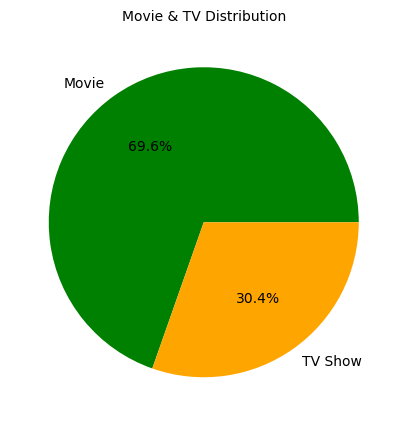

In [133]:
#plotting pie chart for type of content added

type = df['type_encoded'].value_counts()
labels=['Movie','TV Show']
color=['green','orange']
plt.figure(figsize=(5,6))
plt.pie(type, colors = color, labels = labels,autopct = '%0.1f%%')
plt.title('Movie & TV Distribution', fontsize = 10)
plt.axis('off')

plt.show()

### Insights
- Movies occupy the content with 69.6% and TV shows with 30.4%

## Pair Plots

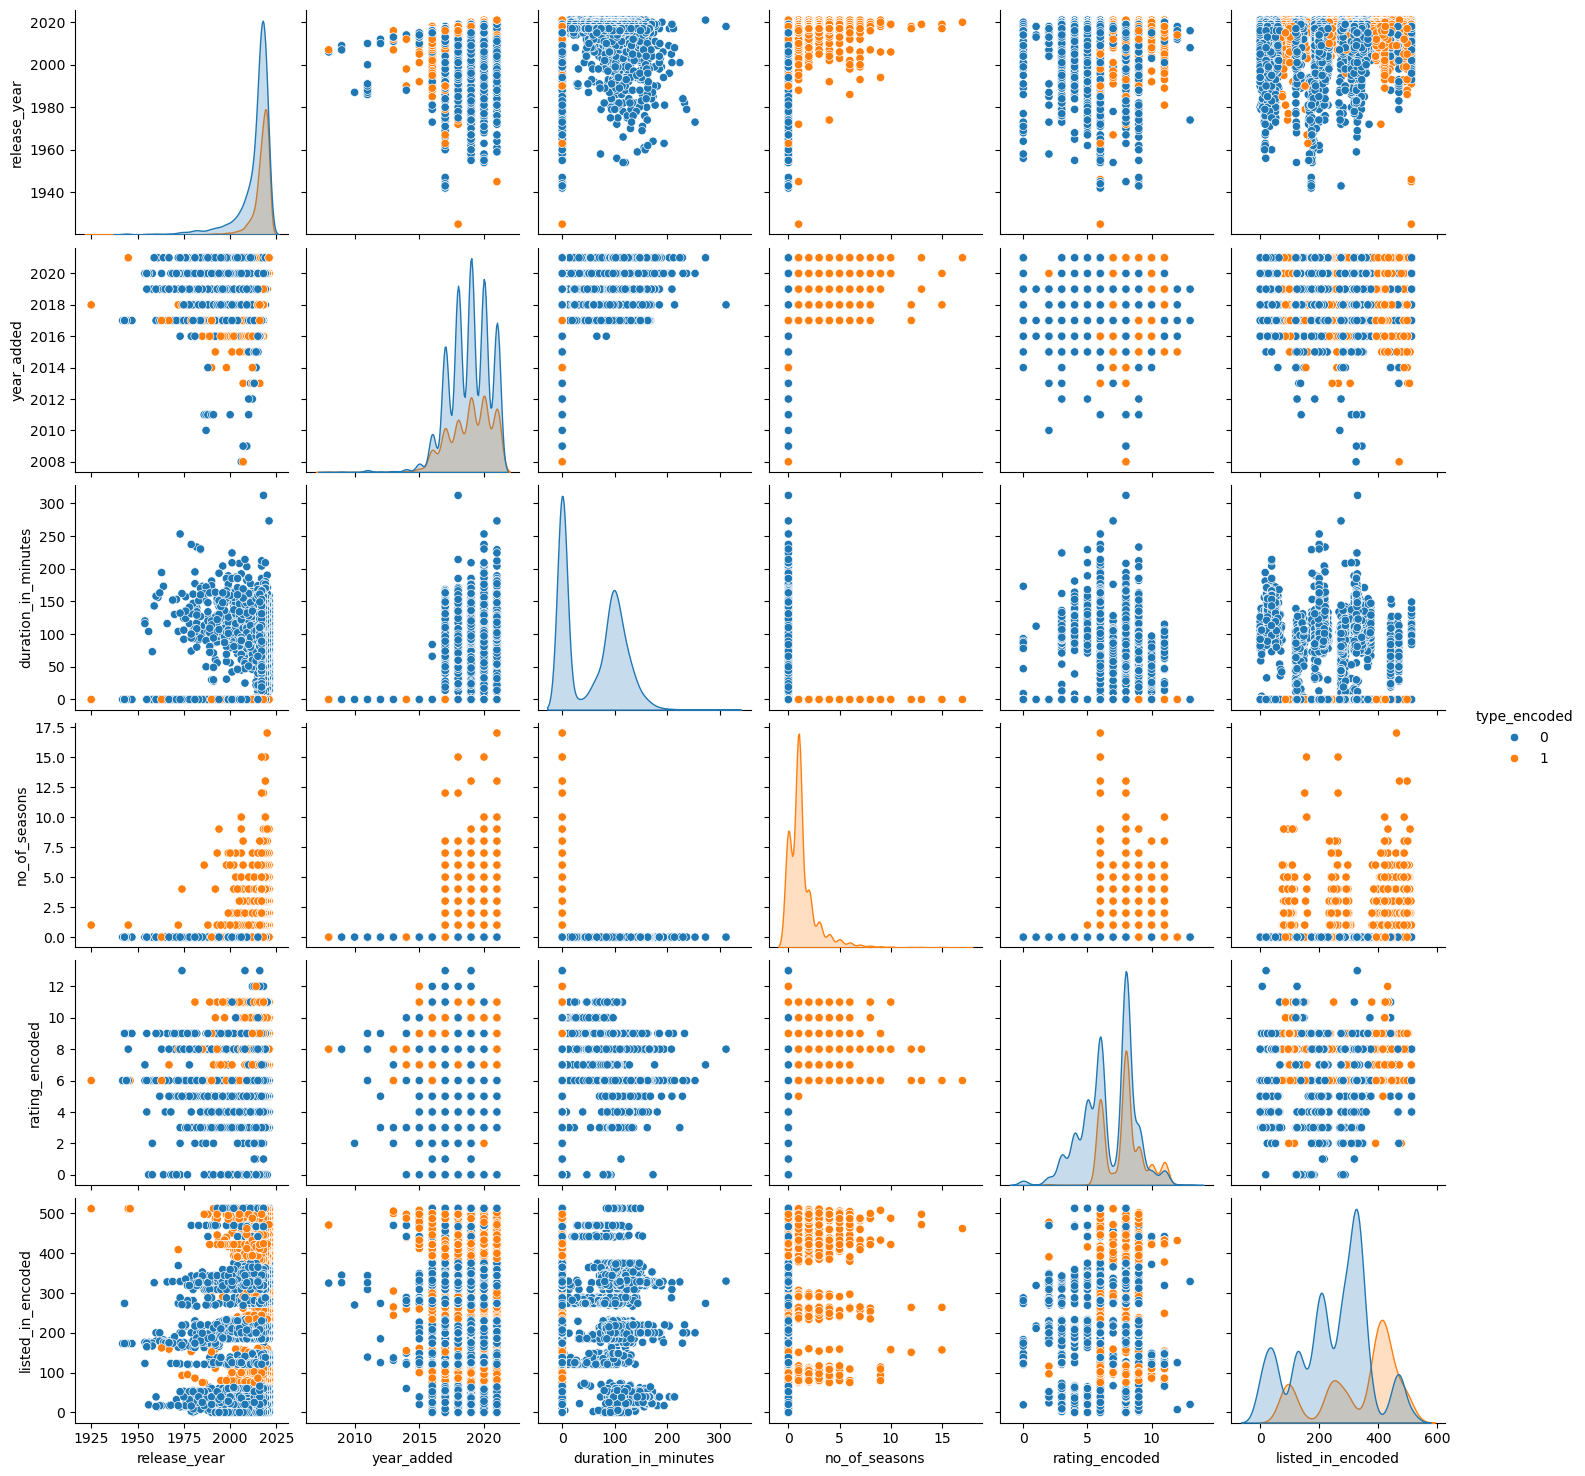

In [134]:
# Selecting numerical features for pair plot
numerical_features = ['release_year', 'year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']

# Create a pair plot with hue as 'type_encoded'
sns.pairplot(df[numerical_features + ['type_encoded']], hue='type_encoded', diag_kind='kde')
plt.show()


### Insights
- We can see that the release_year vs. listed_in_encoded plots have significant clustering, implying that listed_in_encoded is impacted by release year indicating that this feature pair may be useful for classification models.
- KDE charts demonstrate that movies are the most popular content type, with a larger density of blue (indicating movies). This is telling us that movies are more more in the dataset, which might be useful in categorization models.

## Heatmap

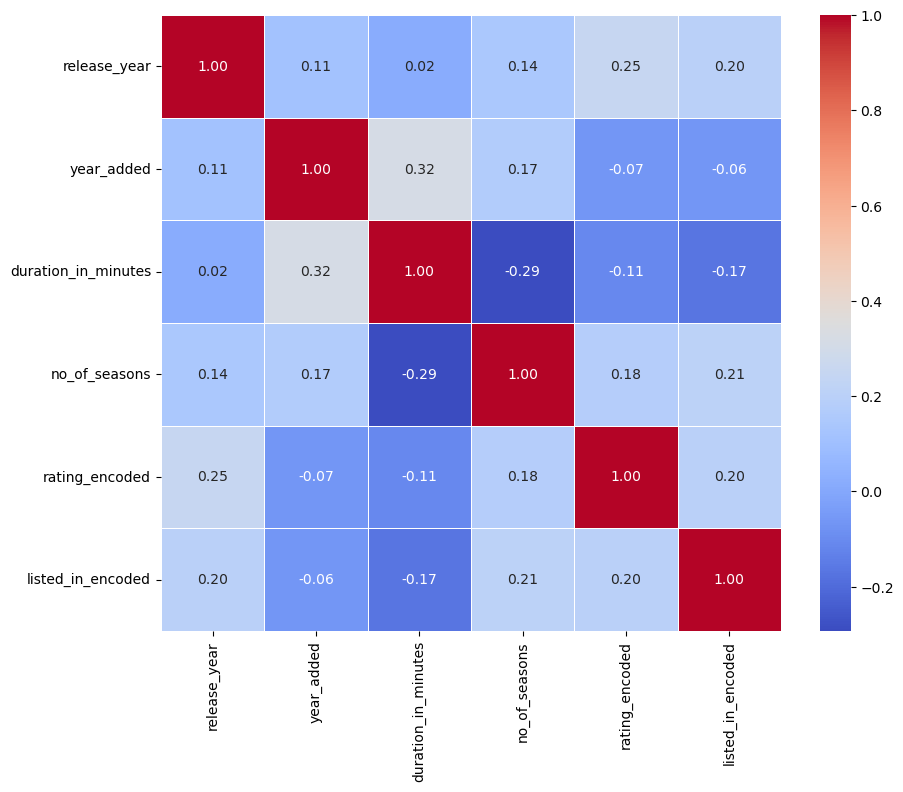

In [135]:
# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

### Insights
- Most of them have weak negative correlation and weak positive correlation.For example, -0.29 for no_of_seasons vs duration_in_minutes and 0.32 year_added vs duration_in_minutes
- These observations indicating the most the features are not influencing each other.But we have to further investigate how they are impacting our target variable.

## Scatter plot

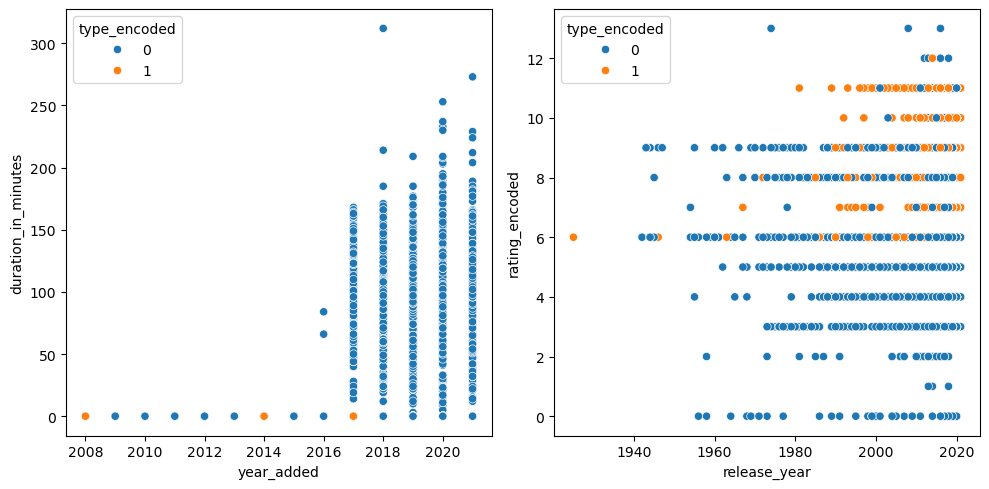

In [136]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# Scatter plot between 'year_added' and 'duration_in_minutes', colored by 'type_encoded'
sns.scatterplot(x='year_added', y='duration_in_minutes',ax=ax1, hue='type_encoded', data=df)

# Scatter plot between 'year_added' and 'duration_in_minutes', colored by 'type_encoded'
sns.scatterplot(x='release_year', y='rating_encoded',ax=ax2, hue='type_encoded', data=df)
plt.tight_layout()
plt.show()

### Insights
- Graph 1 shows there is a weak relation initally between year_added and duration_in_minutes w.r.t to type_encoded but it went strong as the years are increasing.
- Graph 2 tells that recent content are more listed in ratings rather than early ones(1940-2000)

# Models

## Logistic Regression

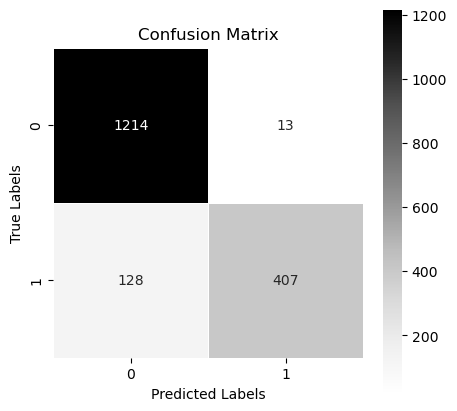


Estimator: Logistic Regression
              precision    recall  f1-score   support

       Movie       0.90      0.99      0.95      1227
     TV Show       0.97      0.76      0.85       535

    accuracy                           0.92      1762
   macro avg       0.94      0.88      0.90      1762
weighted avg       0.92      0.92      0.92      1762



In [137]:
#Script for Logistical Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split

# Selecting features and target variable
x = df[['release_year','year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']].to_numpy()
y = df['type_encoded'].to_numpy()

# Create Training and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
 

for name,method in [('Logistic Regression', LogisticRegression(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

     # Generating the confusion matrix
    cm = confusion_matrix(y_test, predict)
    labels = np.unique(y_test)  # Extract unique class labels
    
    # Plotting the confusion matrix
    plt.figure(figsize=(5, 5))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greys', cbar=True, square=True, linewidths=0.5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print the classification report
    target_names = ['Movie', 'TV Show']  # Assuming 0 = Movie, 1 = TV Show
    print('\nEstimator: {}'.format(name))  
    print(classification_report(y_test, predict, target_names=target_names)) 

### Insights
- Total Predictions for Movie : 1342. Actual values : 1227
- Total Predictions for TV Show : 420. Actual values : 535
- Precision of 0.97 for TV shows, indicating 97% accuracy in predictions.
- Recall of 0.99 for movies, showing 99% success in identifying actual movies.
- Overall accuracy is 92%. F1-score is 0.95 for movies and 0.85 for TV shows, reflecting slightly better performance with movies..


## Support vector machine

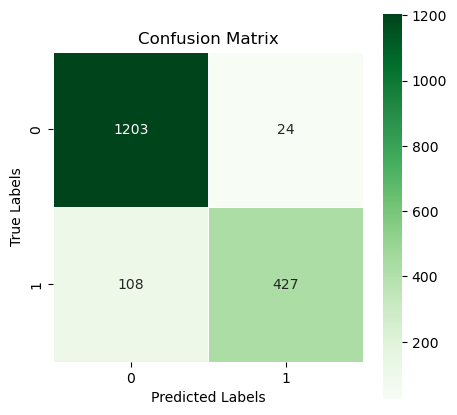


Estimator: SVM
              precision    recall  f1-score   support

       Movie       0.92      0.98      0.95      1227
     TV Show       0.95      0.80      0.87       535

    accuracy                           0.93      1762
   macro avg       0.93      0.89      0.91      1762
weighted avg       0.93      0.93      0.92      1762



In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Selecting features and target variable
x = df[['release_year', 'year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']].to_numpy()
y = df['type_encoded'].to_numpy()

# Create Training and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# Train the SVM model and generate predictions
for name, method in [('SVM', SVC(random_state=100))]: 
    method.fit(x_train2, y_train)
    y_pred = method.predict(x_test2)

    # Generating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)  # Extract unique class labels

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 5))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greens', cbar=True, square=True, linewidths=0.5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print the classification report
    target_names = ['Movie', 'TV Show']  # Assuming 0 = Movie, 1 = TV Show
    print('\nEstimator: {}'.format(name)) 
    print(classification_report(y_test, y_pred, target_names=target_names)) 

### Insights
- Total Predictions for Movie : 1311. Actual values : 1227
- Total Predictions for TV Show : 451. Actual values : 535
- Precision of 0.95 for TV shows, indicating 95% accuracy in predictions.
- Recall of 0.98 for movies, showing 98% success in identifying actual movies.
- Overall accuracy is 92%. The model performs well with high F1-scores for both movies and TV shows, though it slightly favors movies in recall.

## RandomForest

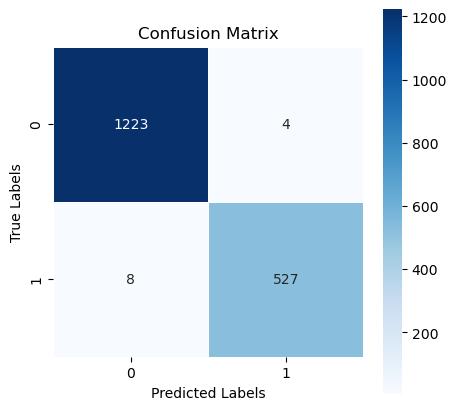


Estimator: Random Forest
              precision    recall  f1-score   support

       Movie       0.99      1.00      1.00      1227
     TV Show       0.99      0.99      0.99       535

    accuracy                           0.99      1762
   macro avg       0.99      0.99      0.99      1762
weighted avg       0.99      0.99      0.99      1762



In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Selecting features and target variable
x = df[['release_year', 'year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']].to_numpy()
y = df['type_encoded'].to_numpy()

# Create Training and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# Train the Random Forest model and generate predictions
for name, method in [('Random Forest', RandomForestClassifier(random_state=100))]: 
    method.fit(x_train2, y_train)
    y_pred = method.predict(x_test2)

    # Generating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)  # Extract unique class labels

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 5))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=True, square=True, linewidths=0.5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print the classification report
    target_names = ['Movie', 'TV Show']  # Assuming 0 = Movie, 1 = TV Show
    print('\nEstimator: {}'.format(name)) 
    print(classification_report(y_test, y_pred, target_names=target_names))


### Insights
- Total Predictions for Movie : 1231. Actual values : 1227
- Total Predictions for TV Show : 531. Actual values : 535
- The model has precision and recall of 0.99 for both Movies and TV Shows, indicating excellent accuracy and effectives.
- The model's overall accuracy is 99%, reflecting strong performance in classification.
- With F1-scores of 0.99 for both classes, the model shows consistent and reliable performance across Movies and TV Shows

## Naive Bayes


Estimator: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1227
           1       0.78      0.81      0.80       535

    accuracy                           0.87      1762
   macro avg       0.85      0.86      0.85      1762
weighted avg       0.88      0.87      0.87      1762



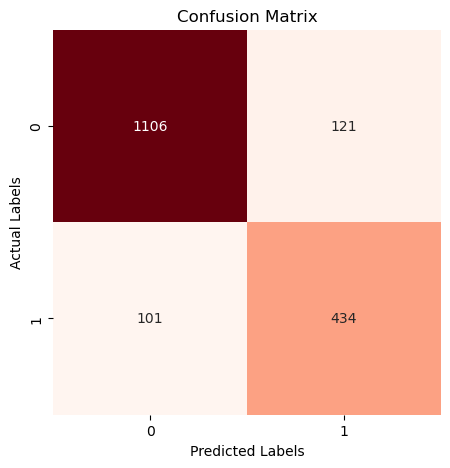

In [140]:
#Script for NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler

x = df[['release_year','year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']].to_numpy()
y = df['type_encoded'].to_numpy()
# Create Training and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


for name,method in [('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(classification_report(y_test,predict,target_names=target_names))
    
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predict)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Insights
- Total Predictions for Movie : 1207. Actual values : 1227
- Total Predictions for TV Show :555. Actual values : 535
- The model shows strong accuracy in predicting movies with a precision of 0.92.
- TV show predictions are less reliable, with a precision of 0.78 and recall of 0.81.
- The model achieves 87% accuracy, performing well overall but with some misclassification.

## Neural Networks

In [141]:
from sklearn.preprocessing import StandardScaler
# Normalize the input features
scaler = StandardScaler()
inputs = scaler.fit_transform(np.array([df['rating_encoded'], df['duration_in_minutes'],df['no_of_seasons'],df['year_added'], df['listed_in_encoded']]).T)
print(inputs.shape)
inputs

(8807, 5)


array([[-1.54767999,  0.93542194, -0.3810365 ,  1.35146839,  0.0103443 ],
       [ 0.50316337, -0.76879904,  1.51703388,  1.35146839,  1.07524544],
       [ 0.50316337, -0.76879904,  0.56799869,  1.35146839, -0.23306167],
       ...,
       [-1.03496915, -0.76879904, -0.3810365 ,  0.08059314, -0.49928695],
       [-2.06039083, -0.76879904, -0.3810365 ,  0.71603077, -1.12301476],
       [-0.52225831, -0.76879904, -0.3810365 ,  0.08059314,  0.42109188]])

In [142]:
target_output = np.array([df['type_encoded']])
target_output = target_output.reshape(8807,1)
print(target_output.shape)
target_output

(8807, 1)


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [143]:
weights = np.array([[0.1],[0.2],[0.3],[0.4],[0.5]])
weights.shape
print(weights)

[[0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]]


In [144]:
bias = 0.3
lr=0.01

In [145]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [146]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [147]:
for epoch in range(2):
    input_x = np.dot(inputs, weights) + bias 
    #print(input_x) #result is 8807 * 1
    output_y = sigmoid(input_x)
    #print(output_y) #result is 8807 * 1
    error = output_y - target_output
    #print(error) #result is 8807 * 1
    x = error.sum() 
    #print(x)
    derror_doutput_y = error 
    #print(derror_doutput_y) #result is 8807 * 1
    doutput_dinput = sigmoid_der(output_y) 
    #print(doutput_dinput) #result is 8807 * 1
    deriv = derror_doutput_y * doutput_dinput #print(douto_dino) 4 * 1
    inputs_T=inputs.T
    deriv_final = np.dot(inputs_T,deriv)
    weights = weights - lr * deriv_final
    for i in deriv:
        bias = bias- lr * i
print("w: ",weights)
print("b: ",bias)

w:  [[ 1.00405343]
 [-5.21992506]
 [ 4.63923522]
 [ 0.26199061]
 [ 0.71307996]]
b:  [-4.84530545]


In [148]:
ip1 = np.array([8,0,2,2021,393])
ip1_scaled = scaler.transform([ip1])
result1 = np.dot(ip1_scaled, weights) + bias
result2 = sigmoid(result1)
print(result2)

ip2 = np.array([4,91,0,2021,121])
ip2_scaled = scaler.transform([ip2])
result1_1 = np.dot(ip2_scaled, weights) + bias
result2_2 = sigmoid(result1_1)
print(result2_2)

[[0.99955534]]
[[1.21949088e-06]]


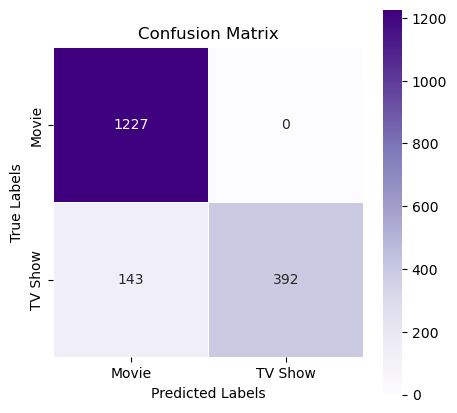

              precision    recall  f1-score   support

       Movie       0.90      1.00      0.94      1227
     TV Show       1.00      0.73      0.85       535

    accuracy                           0.92      1762
   macro avg       0.95      0.87      0.90      1762
weighted avg       0.93      0.92      0.91      1762



In [149]:
# Create training and test datasets
x_train, x_test, y_train, y_test = train_test_split(inputs, target_output, stratify=y, test_size=0.2, random_state=100)

# Make predictions on the test set
test_input_x = np.dot(x_test, weights) + bias
test_output_y = sigmoid(test_input_x)

# Convert probabilities to binary predictions
y_pred = (test_output_y > 0.5).astype(int).reshape(-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
df_cm = pd.DataFrame(cm, index=['Movie', 'TV Show'], columns=['Movie', 'TV Show'])
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Purples', cbar=True, square=True, linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))


### Insights
- Total Predictions for Movie : 1370. Actual values : 1227
- Total Predictions for TV Show : 392. Actual values : 535
- The model attained a precision of 1.00 for TV programs, indicating that it consistently accurately recognizes TV shows with no false positives.
- The model has a recall of 1.00 for movies, which means it accurately identifies all actual movie occurrences without missing any.
- The recall for TV programs is 0.73, showing that 27% of TV series are incorrectly categorized as movies, implying that the model has difficulty identifying TV shows.
-  The model performs well overall, with an accuracy of 0.92; however, its F1-score for TV shows (0.85) is lower than that for movies (0.94), indicating space for development in TV show categorization.how categorization.



## Neural Networks using MLP Classifier with 3 hidden layers


Estimator: MLP Neural Network
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1227
           1       0.95      0.94      0.94       535

    accuracy                           0.97      1762
   macro avg       0.96      0.96      0.96      1762
weighted avg       0.97      0.97      0.97      1762



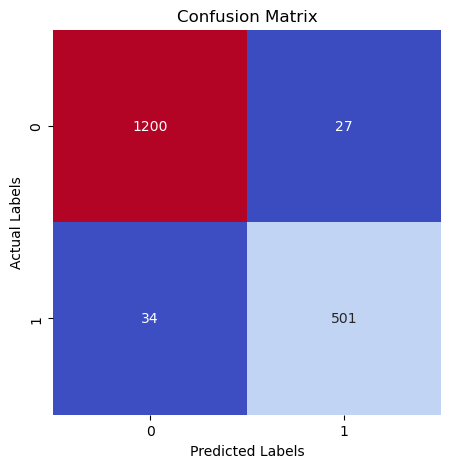

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target
x = df[['release_year', 'year_added', 'duration_in_minutes', 'no_of_seasons', 'rating_encoded', 'listed_in_encoded']].to_numpy()
y = df['type_encoded'].to_numpy()

# Create Training and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

# Scale the Data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Initialize and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=100)
mlp.fit(x_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(x_test_scaled)

# Evaluate the model
target_names = ['0', '1']
print('\nEstimator: MLP Neural Network')
print(classification_report(y_test, predictions, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


### Insights 
- Total Movie Predictions: 1234; Actual Values: 1227
- Total TV Show Predictions: 392. Actual value: 535.
- The precision for both classes is high, indicating that the model is good at minimizing false positives, particularly for class 0.
- Class 0 has a significantly greater recall, indicating that the model is better at detecting all instances of movies than TV shows, with just a few TV series misclassified.
- The model's accuracy is 97%, which means it successfully categorized 97% of the cases in the test set. 